# **Normalization**

In [1]:
import numpy as np

In [2]:
# Sample data
data = np.array([10, 20, 30, 40, 50, 1000]) # 1000 is an outlier

# Min-Max sccaling: scales values between 0 and 1
def min_max_scaling(data):
  min_val = np.min(data)
  max_val = np.max(data)
  scaled_data = (data - min_val) / (max_val - min_val)
  return scaled_data

# Z-Score Standardization: Mean = 0, Standard Deviation = 1
def z_score_standardization(data):
  mean = np.mean(data)
  std_dev = np.std(data)
  std_data = (data - mean) / std_dev
  return std_data

In [3]:
# Apply normalization techniques
min_max_scaled = min_max_scaling(data)
z_score_standardized = z_score_standardization(data)

print("Original Data:", data)
print("Min-Max Scaled Data:", min_max_scaled)
print("Z-Score Standardized Data:", z_score_standardized)

Original Data: [  10   20   30   40   50 1000]
Min-Max Scaled Data: [0.         0.01010101 0.02020202 0.03030303 0.04040404 1.        ]
Z-Score Standardized Data: [-0.50221883 -0.47457376 -0.44692869 -0.41928361 -0.39163854  2.23464343]


# **1. MNIST Handwritten Digits Classification**

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

# Model definition
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Dense layers expect a 1D input, so whenever the preceding layer produces multi-dimensional output,
# We must flatten it to 1D before passing it to a Dense layer

# If the input to a Dense layer is not already 1D, use Flatten to convert it to 1D

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8735 - loss: 0.4405
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9646 - loss: 0.1213
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9757 - loss: 0.0817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0579
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9875 - loss: 0.0413
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0887
Test accuracy: 97.58%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


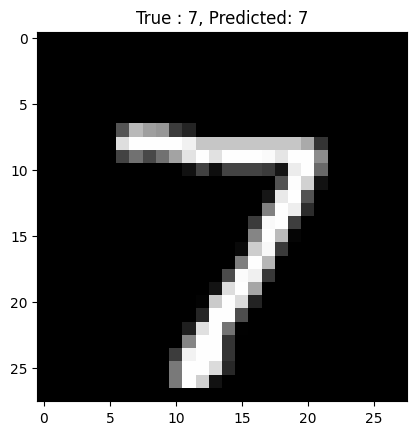

In [6]:
predictions = model.predict(test_images)
plt.imshow(test_images[0], cmap='gray')
plt.title(f"True : {test_labels[0]}, Predicted: {np.argmax(predictions[0])}")
plt.show()

# **2. House Price Prediction (Regression)**

In [7]:
# Predict House prices based on 10 numerical features

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd

In [8]:
# Generate synthetic dataset (1000 samples, 10 features)
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000) * 500000  # House prices between 0-500K

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200) * 500000

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae:.2f}')

# Make a prediction
sample_input = np.random.rand(1, 10)
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0]:.2f}')


# MAE is around 243K - 245K, which means on average, the predictions are off by nearly half of the actual house price.
# This is very bad because an error of 243K in a price range of 500K means the model is almost random.
# The dataset is completely random, meaning there is no real pattern for the model to learn.
# The model is guessing house prices randomly, which is why MAE is so large.
# In short, bad model

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 86718791680.0000 - mae: 255743.1094
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84040605696.0000 - mae: 251750.2031
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83759710208.0000 - mae: 251121.9531
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86244270080.0000 - mae: 255172.2344
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86446522368.0000 - mae: 256274.5156
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83515424768.0000 - mae: 250692.5312
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83647307776.0000 - mae: 251795.1875
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81844928512.0000 - mae: 248509.6406
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81640128512.0000 - mae: 247322.1250
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84273324032.0000 - mae: 250427.0938
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81540661248

**Synthetic dataset and Normalization**

In [9]:
# Example 2 - House Price Prediction (Regression) with Synthetic dataset and Normalization

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features) in [0,1] range
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000)  # Target values in range 0-1

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200)  # Targets in range 0-1

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE (Normalized): {test_mae:.4f}')

# Make a prediction
sample_input = np.random.rand(1, 10)  # In [0,1] range
predicted_value = model.predict(sample_input)
print(f'Predicted Value (Normalized): {predicted_value[0][0]:.4f}')

# This is again a bad model because we are still training on random values (just normalised values)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2435 - mae: 0.4031
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0915 - mae: 0.2597
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0849 - mae: 0.2498
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0854 - mae: 0.2508
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0830 - mae: 0.2458
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0872 - mae: 0.2567
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0793 - mae: 0.2399
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0808 - mae: 0.2442
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0765 - mae: 0.2359
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831 - mae: 0.2484
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0785 - mae: 0.2395
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0778 - mae: 0.2381
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

**Scikit-learn Dataset**

In [10]:
# Example 2 - House Price Prediction (Regression) with Dataset

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load California housing dataset
data = fetch_california_housing()
x, y = data.data, data.target  # Features and target (median house value in 100,000s)

print(f"Target Value Range (in 100,000s): Min = {y.min():.2f}, Max = {y.max():.2f}, Mean = {y.mean():.2f}")

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize features for better training stability - Z-Score Standardization / Standard scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # Compute mean & std from training data, then scale
x_test = scaler.transform(x_test) # Use the same scaling parameters to transform test data

# We use the same mean and standard deviation (computed from x_train) to scale x_test
# This ensures that both training and test data follow the same distribution

# If we include x_test when computing mean and standard deviation, the model gets information from the test set before training
# This is called data leakage, which can lead to unrealistically good performance and poor generalization to new data
# Test data should only be used for evaluation after the model is trained

# In real-world applications, new data arrives after training. We do not get to recompute the mean and std for each new data point
# The model should be able to handle unseen data using the same scaling applied during training

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input features from dataset
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae * 100000:.2f}')  # Convert to actual dollars

# Make a prediction
sample_input = np.expand_dims(x_test[0], axis=0)  # Take one test sample
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0] * 100000:.2f}')  # Convert to actual dollars


Target Value Range (in 100,000s): Min = 0.15, Max = 5.00, Mean = 2.07
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7388 - mae: 0.9123
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4508 - mae: 0.4587
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3756 - mae: 0.4344
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3504 - mae: 0.4174
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3360 - mae: 0.4097
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3233 - mae: 0.4014
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3256 - mae: 0.3946
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3060 - mae: 0.3875
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3143 - mae: 0.3850
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2975 - mae: 0.3821
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2936 - mae: 0.3791
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3078 - mae: 0.3770
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted House Price: $46034.39


# **3. Sentiment Analysis (Binary Classification)**

In [11]:
## Without Embedding Layer

# Classify whether a review is positive or negative

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# IMDB reviews have different lengths, but Dense expects a fixed number of neurons
# We are ensuring every input is exactly 200 words

# Pad sequences to ensure fixed-length inputs
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

model = models.Sequential([
    layers.Flatten(input_shape=(200,)), # Converts 2D sequences to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make a prediction on the first test sample
sample_input = np.expand_dims(x_test[0], axis=0)
predicted_sentiment = model.predict(sample_input)
print(f'Predicted Sentiment: {"Positive" if predicted_sentiment > 0.5 else "Negative"}')

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4956 - loss: 170.6960 - val_accuracy: 0.4988 - val_loss: 24.9361
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5387 - loss: 15.2172 - val_accuracy: 0.5060 - val_loss: 6.6240
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5192 - loss: 4.9883 - val_accuracy: 0.4938 - val_loss: 6.8104
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5376 - loss: 3.7039 - val_accuracy: 0.4976 - val_loss: 3.4397
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5313 - loss: 2.9679 - val_accuracy: 0.5122 - val_loss: 3.0072
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5081 - loss: 2.9644


Test Accuracy: 50.27%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Sentiment: Negative


# With Embedding Layer

The `Embedding` layer **transforms integer word indices into dense vector representations.**


# **Word Index Representation (Before Embedding)**

In the IMDB dataset, words are represented as **integer indices** based on their frequency in the dataset.
For example, a movie review:

**Original Sentence:**
*"The movie was amazing, I loved it!"*

**Tokenized & Indexed Representation:**

[10, 482, 21, 345, 7, 99, 4]

Here:

10 → "The"
482 → "movie"
21 → "was"
345 → "amazing"
7 → "I"
99 → "loved"
4 → "it"
👉 The model does not understand the meaning of these numbers. It only sees them as integers.

**What Embedding Does**
Instead of treating `10`, `482`, `21`, etc., as just numbers, an **embedding layer** converts each of them into a **dense vector** of real numbers.

layers.Embedding(input_dim=10000, output_dim=128, input_length=200)

* `input_dim=10000` → Vocabulary size (top 10,000 words)
* `output_dim=128` → Each word index gets mapped to a 128-dimensional vector
* `input_length=200` → Each review is padded to 200 words

For example, the word index 10 (which represents "The") might be mapped to:

`[0.12, -0.25, 0.78, ..., 0.05]`  *# A 128-dimensional vector*

Each word in the sentence gets a similar vector.

***

**Why Is This Useful?**

* **Captures Word Meaning** → Similar words will have similar vectors.

* **Avoids Numeric Misinterpretation** → Without embeddings, the model might think 99 > 10, which makes no sense for words.

* **Enables Word Relationships** → Words like "king" and "queen" will have similar embeddings.

***

###**Example: Before vs After Embedding**

**Before Embedding (Word Indices)**

`[10, 482, 21, 345, 7, 99, 4]`  *# Just numbers*

**After Embedding (Word Vectors, Each of Size 128)**

[

  [0.12, -0.25, 0.78, ..., 0.05],   # Word 10

  [0.34, 0.67, -0.12, ..., -0.89],  # Word 482
  
  [0.08, 0.15, -0.32, ..., 0.40],   # Word 21
  ...

]

Each word now has a **dense vector representation** that captures its meaning.


In [12]:
## With Embedding Layer

# Classify whether a review is positive or negative

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# IMDB reviews have different lengths, but Dense expects a fixed number of neurons
# We are ensuring every input is exactly 200 words

# Pad sequences to ensure fixed-length inputs
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=200), # Converts word indices to vectors
    layers.Flatten(), # Converts 2D sequences to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=1024, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make a prediction on the first test sample
sample_input = np.expand_dims(x_test[0], axis=0)
predicted_sentiment = model.predict(sample_input)
print(f'Predicted Sentiment: {"Positive" if predicted_sentiment > 0.5 else "Negative"}')

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 815ms/step - accuracy: 0.5424 - loss: 0.6871 - val_accuracy: 0.6010 - val_loss: 0.8458
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 712ms/step - accuracy: 0.7832 - loss: 0.4803 - val_accuracy: 0.8174 - val_loss: 0.4150
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 722ms/step - accuracy: 0.9428 - loss: 0.1645 - val_accuracy: 0.8446 - val_loss: 0.3729
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 712ms/step - accuracy: 0.9893 - loss: 0.0483 - val_accuracy: 0.8402 - val_loss: 0.4303
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 708ms/step - accuracy: 0.9974 - loss: 0.0137 - val_accuracy: 0.8388 - val_loss: 0.4794
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8399 - loss: 0.4777
Test Accuracy: 83.79%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Sentiment: Negative


# **4. Breast Cancer Prediction (Binary Classification)**

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7194 - loss: 0.6066 - val_accuracy: 0.9386 - val_loss: 0.3486
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9171 - loss: 0.3177 - val_accuracy: 0.9649 - val_loss: 0.2000
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9420 - loss: 0.2063 - val_accuracy: 0.9737 - val_loss: 0.1358
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9626 - loss: 0.1378 - val_accuracy: 0.9737 - val_loss: 0.1066
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9724 - loss: 0.1036 - val_accuracy: 0.9737 - val_loss: 0.0922
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9868 - loss: 0.0835 - val_accuracy: 0.9825 - val_loss: 0.0840
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9855 - loss: 0.0753 - val_accuracy: 0.9825 - val_loss: 0.0829
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9785 - loss: 0.0794 - val_accuracy: 0.9737 - val_loss: 0.0808
Ep

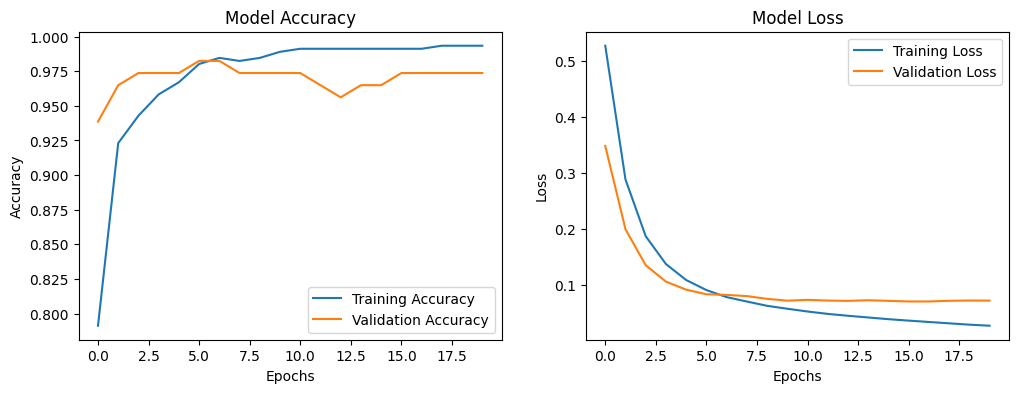

In [13]:
# The Breast Cancer dataset from Scikit-Learn contains 569 samples with 30 numerical features extracted
# from digitized images of breast mass tumors. The goal is to classify tumors as malignant (1) or benign (0)
# based on these features. The dataset was originally curated from the Wisconsin Diagnostic Breast Cancer (WDBC)
# dataset and is commonly used for binary classification tasks in machine learning.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_breast_cancer()
x, y = data.data, data.target

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize features for better training stability - Z-Score Standardization / Standard scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # Compute mean & std from training data, then scale
x_test = scaler.transform(x_test) # Use the same scaling parameters to transform test data

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input features from dataset
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot accuraccy and loss using Matplotlib
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# **5. Wine Quality Prediction (Multiclass Classification)**

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3489 - loss: 1.1509 - val_accuracy: 0.3889 - val_loss: 1.0456
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5222 - loss: 1.0150 - val_accuracy: 0.6667 - val_loss: 0.9136
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7289 - loss: 0.8843 - val_accuracy: 0.8611 - val_loss: 0.7981
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8746 - loss: 0.7728 - val_accuracy: 0.8611 - val_loss: 0.6968
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8591 - loss: 0.6981 - val_accuracy: 0.9167 - val_loss: 0.6025
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9334 - loss: 0.5973 - val_accuracy: 0.9444 - val_loss: 0.5123
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9512 - loss: 0.5051 - val_accuracy: 1.0000 - val_loss: 0.4312
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9628 - loss: 0.4442 - val_accuracy: 1.0000 - val_loss: 0.3588
Epoch 9/20


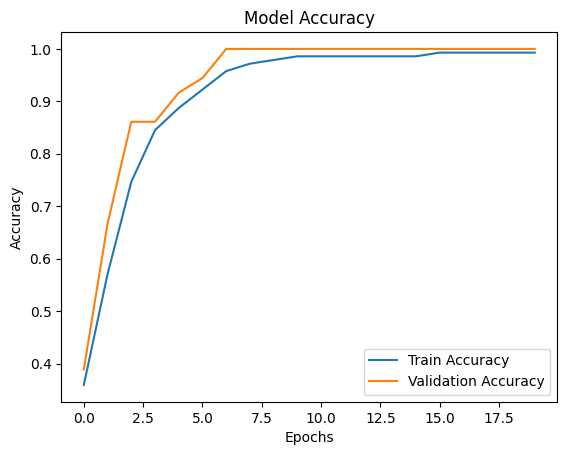

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: 0, Actual Class: 0


In [14]:
# The Wine dataset from Scikit-Learn contains 178 samples with 13 numerical features,
# such as alcohol content, flavonoids, and phenols, representing different chemical properties of wines.
# The goal is to classify wines into three types (Class 0, 1, and 2) based on their composition.
# It originates from the UCI Machine Learning Repository and is commonly used for multiclass classification tasks

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_wine()
X, y = data.data, data.target  # Features and target labels

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features using Z-score standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for wine quality
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Predict a sample
sample_input = np.expand_dims(X_test[0], axis=0)  # Take one test sample
predicted_class = np.argmax(model.predict(sample_input))
print(f'Predicted Class: {predicted_class}, Actual Class: {y_test[0]}')

# Using stratify=y ensures that the proportion of each class remains the same in both training and testing sets,
# leading to a more balanced and representative split.

# Example: Without stratify=y
# If you have a dataset with 80% Class 0, 15% Class 1, and 5% Class 2,
# a random split without stratification might result in:

# Training set: 90% Class 0, 8% Class 1, 2% Class 2
# Test set: 60% Class 0, 30% Class 1, 10% Class 2

# This skews the distribution, leading to poor generalization.

# Example: With stratify=y

# Training set: 80% Class 0, 15% Class 1, 5% Class 2
# Test set: 80% Class 0, 15% Class 1, 5% Class 2

# This ensures a balanced representation of all classes in both sets.

# Always use stratify=y when working with classification problems, especially when your dataset has an unequal class distribution.
